# Imports

## Imports

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import numpy as np
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import operator

data = pd.read_csv("pokemon_data.csv")
data

,Types,TypesCategory,AverageHP,AverageAttack,AverageDefense,AverageSpecialAttack,AverageSpecialDefense,AverageSpeed,AverageTotal,AmountOfPokemon,...,SpecialMoves,StatuesMoves,Resisitances,Imunities,Weaknesses,Supereffective,NotVeryEffective,NoEffect,RestrictedPokemon,Cluster
0,Normal,1,77.10,75.98,62.17,61.11,66.73,73.61,416.71,133,...,29,102,0,1,1,0,2,1,7,1
1,Fighting,2,79.42,109.82,81.60,67.57,74.78,83.85,497.06,82,...,8,8,3,0,3,5,5,1,16,2
2,Flying,3,72.73,78.62,67.24,79.57,69.80,86.28,454.24,112,...,11,5,3,1,3,3,3,0,19,3
3,Poison,4,69.87,75.07,70.27,73.17,72.95,70.08,431.41,87,...,14,12,5,0,2,2,4,1,5,5
4,Ground,5,78.94,91.64,88.68,62.99,68.72,61.13,452.10,77,...,9,5,2,1,3,5,2,1,8,5
5,Rock,6,69.03,90.62,99.45,63.23,73.66,61.49,457.49,78,...,6,5,4,0,5,4,3,0,5,5
6,Bug,7,57.10,60.95,64.33,55.84,55.99,58.96,353.17,92,...,9,10,3,0,3,3,7,0,1,4
7,Ghost,8,66.66,79.02,78.95,84.62,79.18,68.63,457.06,73,...,12,7,2,2,2,2,1,1,9,5
8,Steel,9,71.46,96.57,108.36,75.83,82.84,65.54,500.60,77,...,10,7,10,1,3,3,4,0,14,2
9,Fire,10,72.14,85.56,72.28,88.84,74.24,76.96,470.02,87,...,30,3,6,0,3,4,4,0,10,5


## Quick PreCheck

In [2]:
maxHP = data.AverageHP.max()
minHP = data.AverageHP.min()
maxAtt = data.AverageAttack.max()
minAtt = data.AverageAttack.min()
maxSpAtt = data.AverageSpecialAttack.max()
minSpAtt = data.AverageSpecialAttack.min()
maxDef = data.AverageDefense.max()
minDef = data.AverageDefense.min()
maxSpDef = data.AverageSpecialDefense.max()
minSpDef = data.AverageSpecialDefense.min()
maxSpeed = data.AverageSpeed.max()
minSpeed = data.AverageSpeed.min()
maxTotal = data.AverageTotal.max()
minTotal = data.AverageTotal.min()

totalAvgList = []
typeCatList = []
for i in range(len(data)):
    totalAvgList.append(data.AverageTotal[i])
    typeCatList.append(data.TypesCategory[i])

linearModel = scipy.stats.linregress(typeCatList, totalAvgList)
corr = round(linearModel.rvalue, 3)

print("The maximum HP is", maxHP, "and it corresponds with the dragon type")
print("The minimum HP is", minHP, "and it corresponds with the bug type")
print("----------------------------------------------------------------")
print("The maximum Attack is", maxAtt, "and it corresponds with the fighting type")
print("The minimum Attack is", minAtt, "and it corresponds with the bug type")
print("---------------------------------------------------------------------")
print("The maximum Special Attack is", maxSpAtt, "and it corresponds with the steel type")
print("The minimum Special Attack is", minSpAtt, "and it corresponds with the normal type")
print("----------------------------------------------------------------------------------")
print("The maximum Defense is", maxDef, "and it corresponds with the dragon type")
print("The minimum Defense is", minDef, "and it corresponds with the bug type")
print("----------------------------------------------------------------------")
print("The maximum Special Defense is", maxSpDef, "and it corresponds with the fairy type")
print("The minimum Special Defense is", minSpDef, "and it corresponds with the bug type")
print("--------------------------------------------------------------------------------")
print("The maximum Speed is", maxSpeed, "and it corresponds with the dragon type")
print("The minimum Speed is", minSpeed, "and it corresponds with the bug type")
print("----------------------------------------------------------------------")
print("The maximum Total Stats is", maxTotal, "and it corresponds with the dragon type")
print("The minimum Total Stats is", maxTotal, "and it corresponds with the bug type")
print("----------------------------------------------------------------------------")
print("The r-value between the types and the total average is", corr)
print("------------------------------------------------------------")

The maximum HP is 89.75 and it corresponds with the dragon type
The minimum HP is 57.1 and it corresponds with the bug type
----------------------------------------------------------------
The maximum Attack is 109.82 and it corresponds with the fighting type
The minimum Attack is 60.95 and it corresponds with the bug type
---------------------------------------------------------------------
The maximum Special Attack is 98.31 and it corresponds with the steel type
The minimum Special Attack is 55.84 and it corresponds with the normal type
----------------------------------------------------------------------------------
The maximum Defense is 108.36 and it corresponds with the dragon type
The minimum Defense is 62.17 and it corresponds with the bug type
----------------------------------------------------------------------
The maximum Special Defense is 93.6 and it corresponds with the fairy type
The minimum Special Defense is 55.99 and it corresponds with the bug type
---------------

([<matplotlib.axis.YTick at 0x2149de93200>,
 [Text(0, 0, 'TypesCategory'),
  Text(0, 1, 'AverageHP'),
  Text(0, 2, 'AverageAttack'),
  Text(0, 3, 'AverageDefense'),
  Text(0, 4, 'AverageSpecialAttack'),
  Text(0, 5, 'AverageSpecialDefense'),
  Text(0, 6, 'AverageSpeed'),
  Text(0, 7, 'AverageTotal'),
  Text(0, 8, 'AmountOfPokemon'),
  Text(0, 9, 'PhysicalMoves'),
  Text(0, 10, 'SpecialMoves'),
  Text(0, 11, 'StatuesMoves'),
  Text(0, 12, 'Resisitances'),
  Text(0, 13, 'Imunities'),
  Text(0, 14, 'Weaknesses'),
  Text(0, 15, 'Supereffective'),
  Text(0, 16, 'NotVeryEffective'),
  Text(0, 17, 'NoEffect'),
  Text(0, 18, 'RestrictedPokemon'),
  Text(0, 19, 'Cluster')])

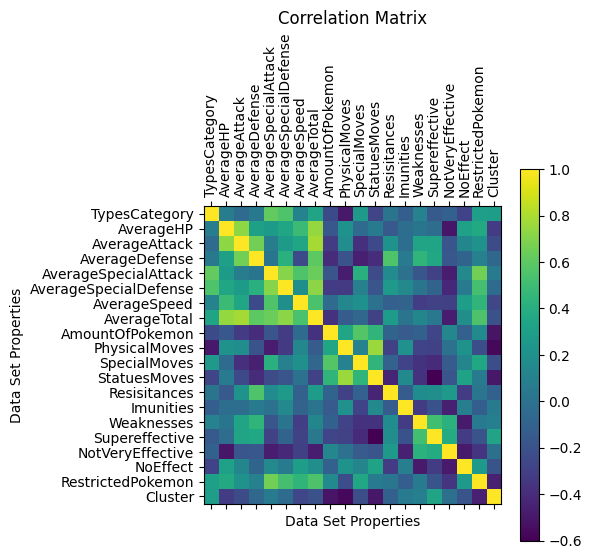

In [3]:
dataCorr = data.corr(numeric_only=True)
dataLabelNums = len(dataCorr.index)
plt.matshow(dataCorr)
plt.colorbar()
plt.xlabel("Data Set Properties")
plt.ylabel("Data Set Properties")
plt.title("Correlation Matrix")
plt.xticks(range(dataLabelNums), dataCorr.index, rotation=90)
plt.yticks(range(dataLabelNums), dataCorr.index)

In [4]:
# a quick check to see if the AverageTotal column is actually the average
# total stats. in other words, do my average stats all add up to the value
# in the AverageTotal column?
for i in range(len(data)):
    totalAvgCheck = data["AverageHP"][i] + data["AverageAttack"][i] +\
    data["AverageDefense"][i] + data["AverageSpecialAttack"][i] +\
    data["AverageSpecialDefense"][i] + data["AverageSpeed"][i]
    totalAvgCheck = round(totalAvgCheck, 2)

    print(data["Types"][i])
    if totalAvgCheck == data["AverageTotal"][i]:
        print("True")
    else:
        print()
        print("False:")
        print("Total Avg Check =", totalAvgCheck)
        print("Total Avg Actual =", data["AverageTotal"][i])
    print("--------------")

Normal

False:
Total Avg Check = 416.7
Total Avg Actual = 416.71
--------------
Fighting

False:
Total Avg Check = 497.04
Total Avg Actual = 497.06
--------------
Flying
True
--------------
Poison
True
--------------
Ground
True
--------------
Rock

False:
Total Avg Check = 457.48
Total Avg Actual = 457.49
--------------
Bug
True
--------------
Ghost
True
--------------
Steel
True
--------------
Fire
True
--------------
Water
True
--------------
Grass

False:
Total Avg Check = 429.44
Total Avg Actual = 432.44
--------------
Electric
True
--------------
Psychic
True
--------------
Ice
True
--------------
Dragon
True
--------------
Dark

False:
Total Avg Check = 471.64
Total Avg Actual = 471.62
--------------
Fairy
True
--------------


Even though about a quarter of the types aren't exact, I'm going to go off of the assumption that the AverageTotal column is correct, because 1) the numbers are always (with the exepction of grass) within .02 from making it the same, and 2) the actual AverageTotal column was calculated with all of the actual stats, and not the way that I'm doing it, making it much more accurate

# Research Question 1

## Machine-Learning Test

First, I'm performing a quick test to see if we can't get a machine learning algorith to reliably guess which types belong to certain groups, found over in the R file, since if it can, we can then have it find the group that would be best. Otherwise, we'll have to manually group them seperatly from that R file and get the best from that grouping

Text(0, 0.5, '% Accuracy')

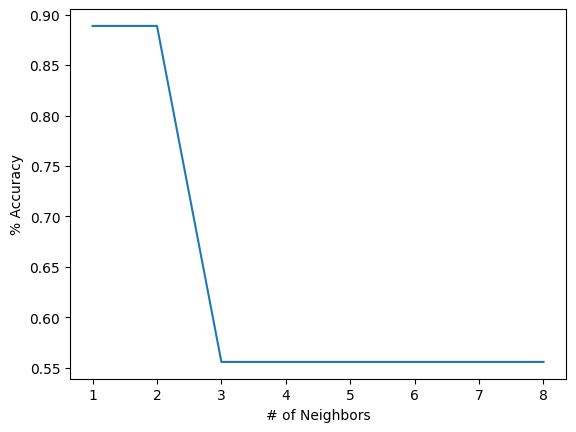

In [75]:
# creating the train-test split data
x = data.drop(columns=["Types", "Cluster"])
y = data.Cluster
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.5)

# creating empty lists to store some temporary values
kValues = []
accuracies = []

# quick loop to determine how many neighbors should be looked at for the highest accuracy
for k in range(1, 9):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xTrain, yTrain)
    
    predictions = classifier.predict(xTest)
    
    accuracy = accuracy_score(yTest, predictions)

    kValues.append(k)
    accuracies.append(accuracy)

# plotting findings
plt.plot(kValues, accuracies)
plt.xlabel("# of Neighbors")
plt.ylabel("% Accuracy")

88.89 %


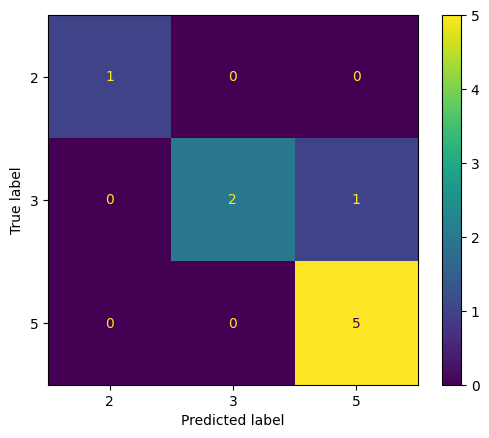

In [76]:
# using the optimal number of neighbors found above to see if the algorithm can correctly
# determine the groupings of the data that the R file found (thats where the cluster column came from)
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(xTrain, yTrain)

predictions = classifier.predict(xTest)

accuraciesAll = []
accuracy = accuracy_score(yTest, predictions)
accuraciesAll.append(round((accuracy*100), 2))
print(round((accuracy*100), 2), "%")

# displaying the confusion matrix. no, i have no idea why it looks like this, and have been
# fiddling with it for almost an hour to get it to look normal, but it simply won't
ConfusionMatrixDisplay.from_estimator(classifier, xTest, yTest)

Text(0, 0.5, '% Accuracy')

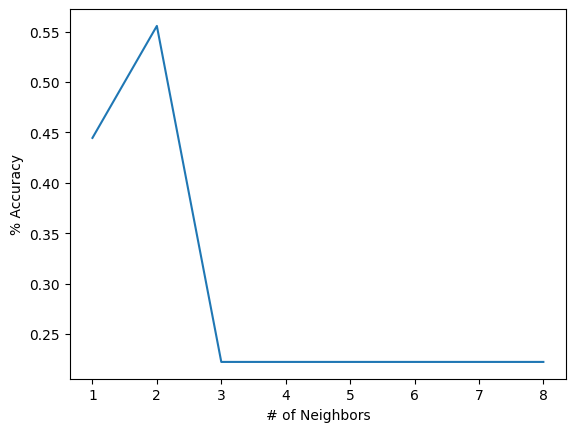

In [77]:
# creating the train-test split data
x = data.drop(columns=["Types", "Cluster"])
y = data.Cluster
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.5)

# creating empty lists to store some temporary values
kValues = []
accuracies = []

# quick loop to determine how many neighbors should be looked at for the highest accuracy
for k in range(1, 9):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xTrain, yTrain)
    
    predictions = classifier.predict(xTest)
    
    accuracy = accuracy_score(yTest, predictions)

    kValues.append(k)
    accuracies.append(accuracy)

# plotting findings
plt.plot(kValues, accuracies)
plt.xlabel("# of Neighbors")
plt.ylabel("% Accuracy")

55.56 %


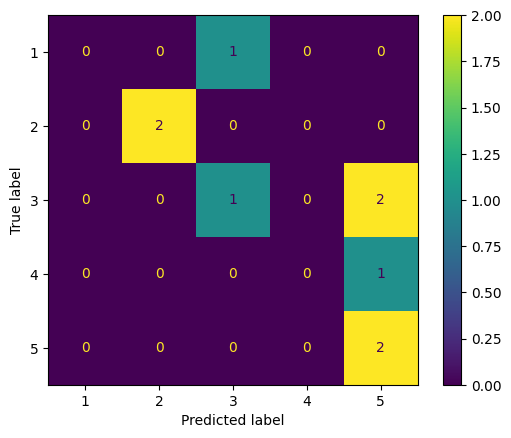

In [78]:
# using the optimal number of neighbors found above to see if the algorithm can correctly
# determine the groupings of the data that the R file found (thats where the cluster column came from)
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(xTrain, yTrain)

predictions = classifier.predict(xTest)

accuracy = accuracy_score(yTest, predictions)
accuraciesAll.append(round((accuracy*100), 2))
print(round((accuracy*100), 2), "%")

# displaying the confusion matrix. no, i have no idea why it looks like this, and have been
# fiddling with it for almost an hour to get it to look normal, but it simply won't
ConfusionMatrixDisplay.from_estimator(classifier, xTest, yTest)

Text(0, 0.5, '% Accuracy')

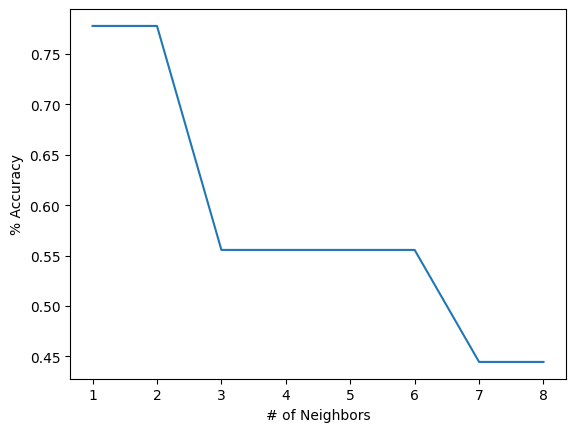

In [79]:
# creating the train-test split data
x = data.drop(columns=["Types", "Cluster"])
y = data.Cluster
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.5)

# creating empty lists to store some temporary values
kValues = []
accuracies = []

# quick loop to determine how many neighbors should be looked at for the highest accuracy
for k in range(1, 9):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xTrain, yTrain)
    
    predictions = classifier.predict(xTest)
    
    accuracy = accuracy_score(yTest, predictions)

    kValues.append(k)
    accuracies.append(accuracy)

# plotting findings
plt.plot(kValues, accuracies)
plt.xlabel("# of Neighbors")
plt.ylabel("% Accuracy")

77.78 %


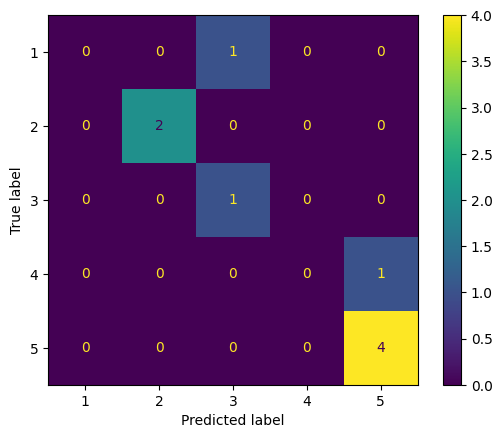

In [80]:
# using the optimal number of neighbors found above to see if the algorithm can correctly
# determine the groupings of the data that the R file found (thats where the cluster column came from)
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(xTrain, yTrain)

predictions = classifier.predict(xTest)

accuracy = accuracy_score(yTest, predictions)
accuraciesAll.append(round((accuracy*100), 2))
print(round((accuracy*100), 2), "%")

# displaying the confusion matrix. no, i have no idea why it looks like this, and have been
# fiddling with it for almost an hour to get it to look normal, but it simply won't
ConfusionMatrixDisplay.from_estimator(classifier, xTest, yTest)

Text(0, 0.5, '% Accuracy')

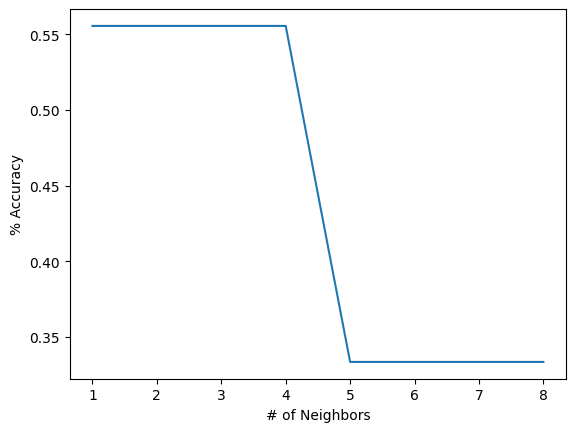

In [81]:
# creating the train-test split data
x = data.drop(columns=["Types", "Cluster"])
y = data.Cluster
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.5)

# creating empty lists to store some temporary values
kValues = []
accuracies = []

# quick loop to determine how many neighbors should be looked at for the highest accuracy
for k in range(1, 9):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xTrain, yTrain)
    
    predictions = classifier.predict(xTest)
    
    accuracy = accuracy_score(yTest, predictions)

    kValues.append(k)
    accuracies.append(accuracy)

# plotting findings
plt.plot(kValues, accuracies)
plt.xlabel("# of Neighbors")
plt.ylabel("% Accuracy")

55.56 %


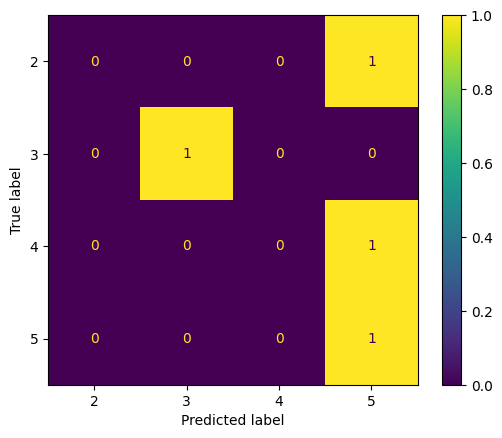

In [82]:
# using the optimal number of neighbors found above to see if the algorithm can correctly
# determine the groupings of the data that the R file found (thats where the cluster column came from)
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(xTrain, yTrain)

predictions = classifier.predict(xTest)

accuracy = accuracy_score(yTest, predictions)
accuraciesAll.append(round((accuracy*100), 2))
print(round((accuracy*100), 2), "%")

# displaying the confusion matrix. no, i have no idea why it looks like this, and have been
# fiddling with it for almost an hour to get it to look normal, but it simply won't
ConfusionMatrixDisplay.from_estimator(classifier, xTest, yTest, normalize='true')

Text(0, 0.5, '% Accuracy')

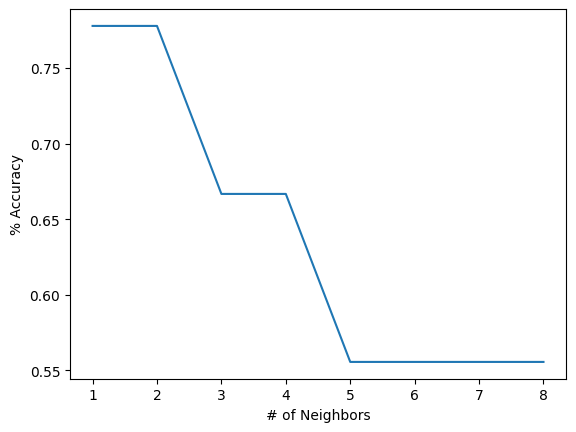

In [83]:
# creating the train-test split data
x = data.drop(columns=["Types", "Cluster"])
y = data.Cluster
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.5)

# creating empty lists to store some temporary values
kValues = []
accuracies = []

# quick loop to determine how many neighbors should be looked at for the highest accuracy
for k in range(1, 9):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xTrain, yTrain)
    
    predictions = classifier.predict(xTest)
    
    accuracy = accuracy_score(yTest, predictions)

    kValues.append(k)
    accuracies.append(accuracy)

# plotting findings
plt.plot(kValues, accuracies)
plt.xlabel("# of Neighbors")
plt.ylabel("% Accuracy")

77.78 %


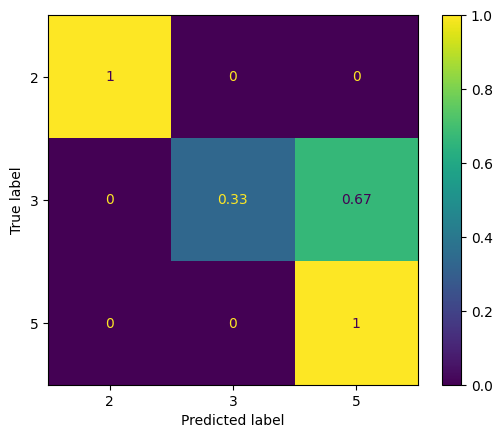

In [84]:
# using the optimal number of neighbors found above to see if the algorithm can correctly
# determine the groupings of the data that the R file found (thats where the cluster column came from)
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(xTrain, yTrain)

predictions = classifier.predict(xTest)

accuracy = accuracy_score(yTest, predictions)
accuraciesAll.append(round((accuracy*100), 2))
print(round((accuracy*100), 2), "%")

# displaying the confusion matrix. no, i have no idea why it looks like this, and have been
# fiddling with it for almost an hour to get it to look normal, but it simply won't
ConfusionMatrixDisplay.from_estimator(classifier, xTest, yTest, normalize='true')

Text(0, 0.5, '% Accuracy')

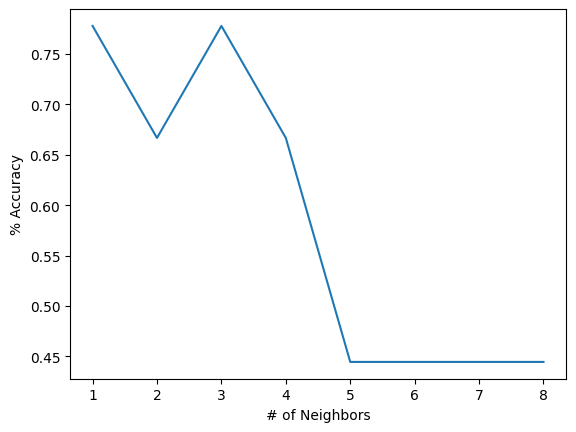

In [85]:
# creating the train-test split data
x = data.drop(columns=["Types", "Cluster"])
y = data.Cluster
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.5)

# creating empty lists to store some temporary values
kValues = []
accuracies = []

# quick loop to determine how many neighbors should be looked at for the highest accuracy
for k in range(1, 9):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xTrain, yTrain)
    
    predictions = classifier.predict(xTest)
    
    accuracy = accuracy_score(yTest, predictions)

    kValues.append(k)
    accuracies.append(accuracy)

# plotting findings
plt.plot(kValues, accuracies)
plt.xlabel("# of Neighbors")
plt.ylabel("% Accuracy")

77.78 %


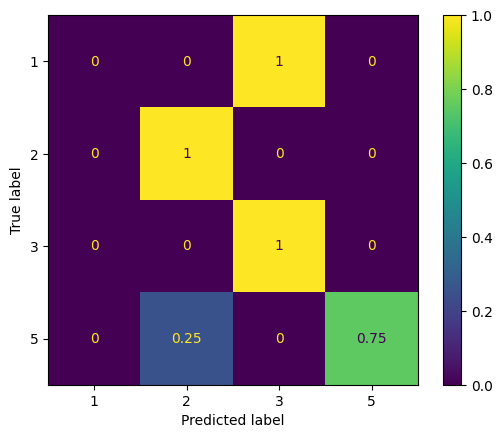

In [86]:
# using the optimal number of neighbors found above to see if the algorithm can correctly
# determine the groupings of the data that the R file found (thats where the cluster column came from)
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(xTrain, yTrain)

predictions = classifier.predict(xTest)

accuracy = accuracy_score(yTest, predictions)
accuraciesAll.append(round((accuracy*100), 2))
print(round((accuracy*100), 2), "%")

# displaying the confusion matrix. no, i have no idea why it looks like this, and have been
# fiddling with it for almost an hour to get it to look normal, but it simply won't
ConfusionMatrixDisplay.from_estimator(classifier, xTest, yTest, normalize='true')

Text(0, 0.5, '% Accuracy')

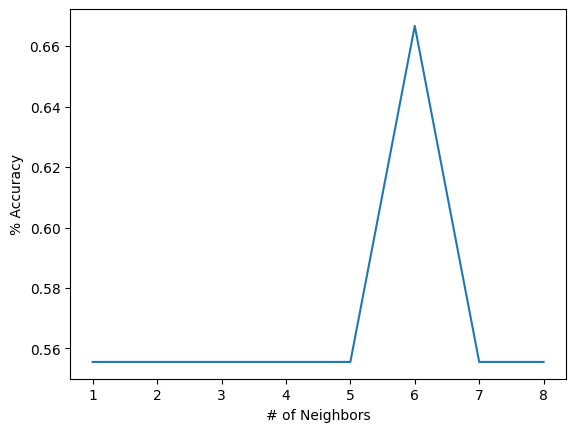

In [87]:
# creating the train-test split data
x = data.drop(columns=["Types", "Cluster"])
y = data.Cluster
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.5)

# creating empty lists to store some temporary values
kValues = []
accuracies = []

# quick loop to determine how many neighbors should be looked at for the highest accuracy
for k in range(1, 9):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xTrain, yTrain)
    
    predictions = classifier.predict(xTest)
    
    accuracy = accuracy_score(yTest, predictions)

    kValues.append(k)
    accuracies.append(accuracy)

# plotting findings
plt.plot(kValues, accuracies)
plt.xlabel("# of Neighbors")
plt.ylabel("% Accuracy")

66.67 %


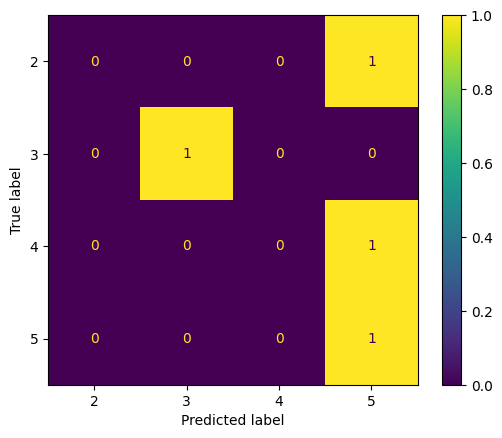

In [88]:
# using the optimal number of neighbors found above to see if the algorithm can correctly
# determine the groupings of the data that the R file found (thats where the cluster column came from)
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(xTrain, yTrain)

predictions = classifier.predict(xTest)

accuracy = accuracy_score(yTest, predictions)
accuraciesAll.append(round((accuracy*100), 2))
print(round((accuracy*100), 2), "%")

# displaying the confusion matrix. no, i have no idea why it looks like this, and have been
# fiddling with it for almost an hour to get it to look normal, but it simply won't
ConfusionMatrixDisplay.from_estimator(classifier, xTest, yTest, normalize='true')

Text(0, 0.5, '% Accuracy')

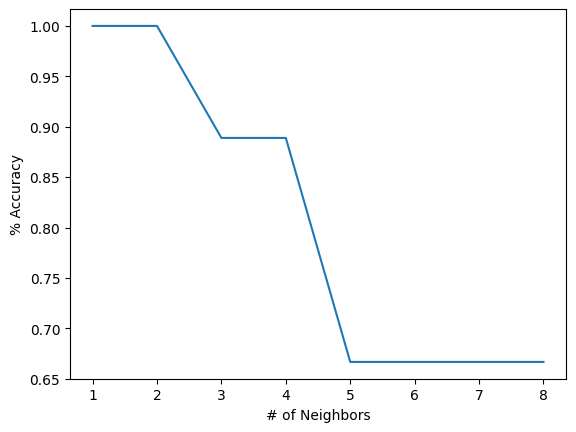

In [89]:
# creating the train-test split data
x = data.drop(columns=["Types", "Cluster"])
y = data.Cluster
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.5)

# creating empty lists to store some temporary values
kValues = []
accuracies = []

# quick loop to determine how many neighbors should be looked at for the highest accuracy
for k in range(1, 9):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xTrain, yTrain)
    
    predictions = classifier.predict(xTest)
    
    accuracy = accuracy_score(yTest, predictions)

    kValues.append(k)
    accuracies.append(accuracy)

# plotting findings
plt.plot(kValues, accuracies)
plt.xlabel("# of Neighbors")
plt.ylabel("% Accuracy")

100.0 %


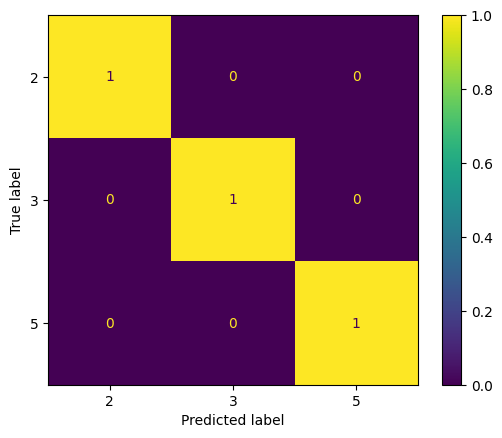

In [90]:
# using the optimal number of neighbors found above to see if the algorithm can correctly
# determine the groupings of the data that the R file found (thats where the cluster column came from)
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(xTrain, yTrain)

predictions = classifier.predict(xTest)

accuracy = accuracy_score(yTest, predictions)
accuraciesAll.append(round((accuracy*100), 2))
print(round((accuracy*100), 2), "%")

# displaying the confusion matrix. no, i have no idea why it looks like this, and have been
# fiddling with it for almost an hour to get it to look normal, but it simply won't
ConfusionMatrixDisplay.from_estimator(classifier, xTest, yTest, normalize='true')

Text(0, 0.5, '% Accuracy')

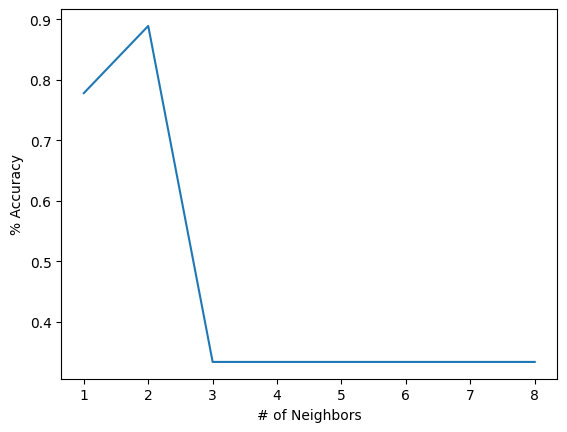

In [91]:
# creating the train-test split data
x = data.drop(columns=["Types", "Cluster"])
y = data.Cluster
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.5)

# creating empty lists to store some temporary values
kValues = []
accuracies = []

# quick loop to determine how many neighbors should be looked at for the highest accuracy
for k in range(1, 9):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xTrain, yTrain)
    
    predictions = classifier.predict(xTest)
    
    accuracy = accuracy_score(yTest, predictions)

    kValues.append(k)
    accuracies.append(accuracy)

# plotting findings
plt.plot(kValues, accuracies)
plt.xlabel("# of Neighbors")
plt.ylabel("% Accuracy")

88.89 %


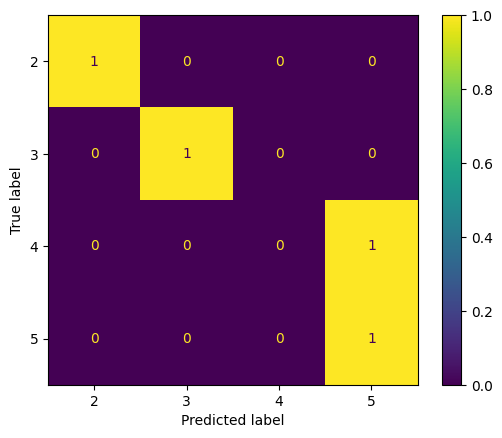

In [92]:
# using the optimal number of neighbors found above to see if the algorithm can correctly
# determine the groupings of the data that the R file found (thats where the cluster column came from)
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(xTrain, yTrain)

predictions = classifier.predict(xTest)

accuracy = accuracy_score(yTest, predictions)
accuraciesAll.append(round((accuracy*100), 2))
print(round((accuracy*100), 2), "%")

# displaying the confusion matrix. no, i have no idea why it looks like this, and have been
# fiddling with it for almost an hour to get it to look normal, but it simply won't
ConfusionMatrixDisplay.from_estimator(classifier, xTest, yTest, normalize='true')

Text(0, 0.5, '% Accuracy')

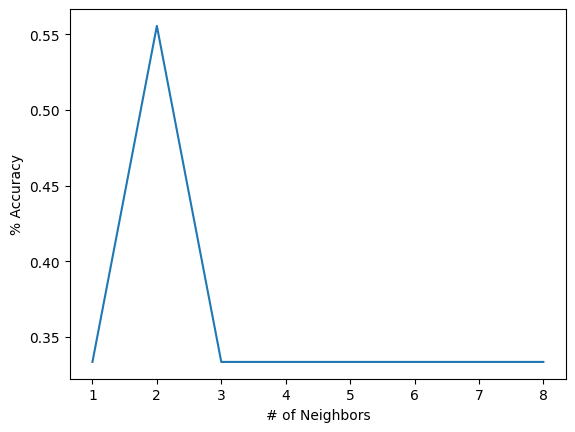

In [93]:
# creating the train-test split data
x = data.drop(columns=["Types", "Cluster"])
y = data.Cluster
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.5)

# creating empty lists to store some temporary values
kValues = []
accuracies = []

# quick loop to determine how many neighbors should be looked at for the highest accuracy
for k in range(1, 9):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xTrain, yTrain)
    
    predictions = classifier.predict(xTest)
    
    accuracy = accuracy_score(yTest, predictions)

    kValues.append(k)
    accuracies.append(accuracy)

# plotting findings
plt.plot(kValues, accuracies)
plt.xlabel("# of Neighbors")
plt.ylabel("% Accuracy")

55.56 %


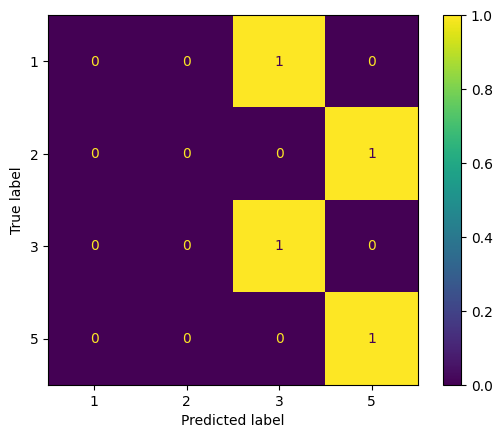

In [94]:
# using the optimal number of neighbors found above to see if the algorithm can correctly
# determine the groupings of the data that the R file found (thats where the cluster column came from)
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(xTrain, yTrain)

predictions = classifier.predict(xTest)

accuracy = accuracy_score(yTest, predictions)
accuraciesAll.append(round((accuracy*100), 2))
print(round((accuracy*100), 2), "%")

# displaying the confusion matrix. no, i have no idea why it looks like this, and have been
# fiddling with it for almost an hour to get it to look normal, but it simply won't
ConfusionMatrixDisplay.from_estimator(classifier, xTest, yTest, normalize='true')

In [95]:
print(len(accuraciesAll))

10


In [99]:
print("The max accuracy of the machine learning was", max(accuraciesAll),"%")
print("The average of the machine learning accuracy is", sum(accuraciesAll) / len(accuraciesAll),"%")
print("The range of the machine learning accuracy is", max(accuraciesAll) - min(accuraciesAll),"%")

The max accuracy of the machine learning was 100.0 %
The average of the machine learning accuracy is 74.447 %
The range of the machine learning accuracy is 44.44 %


Manual grouping is required, as the algorithm either does not properly understand the grouping, or how to match it

## Manual Grouping

In [5]:
# pulling a few critical values to get the grouping correct
print(data.AverageTotal.min())
print(data.AverageTotal.max())
print(data.AverageTotal.mean())
print(data.AverageTotal.std())

353.17
553.87
457.44944444444445
40.23030749136369


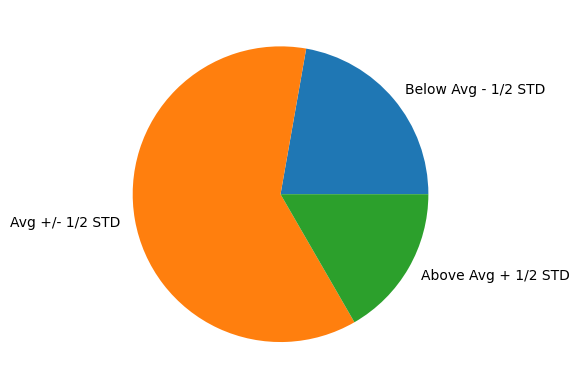

In [15]:
# defining a mapper function in order to group the data
def mapper(x):
    if x < (data.AverageTotal.mean() - (data.AverageTotal.std()/2)):
        return 0
    elif x < (data.AverageTotal.mean() + (data.AverageTotal.std()/2)):
        return 1
    else:
        return 2

# using the mapper function above to actaually do the grouping
catTypeTotalAvg = []   
for i in range(len(data)):
    catTypeTotalAvg.append(mapper(data.AverageTotal[i]))
catTypeTotalAvg = pd.Categorical(catTypeTotalAvg)

# show time!!!
labels = ["Below Avg - 1/2 STD", "Avg +/- 1/2 STD", "Above Avg + 1/2 STD"]
catTypeTotalAvgNum = catTypeTotalAvg.value_counts()
plt.pie(catTypeTotalAvgNum, labels=labels)
plt.savefig("Pokemon Types Seperated into Groups")

So the data is split decently evenly, but obviously, the types that would be best should be those with the highest average, or those in the 'Above 3rd Quartile' group.

In [14]:
# new list for sorting (will be the final list too! :))
bestGroup = []

# iterating through the dataframe to redo the mapping (cause it was turned into
# a categorical data type and i'm not about to lose time potentially fighting with
# that) and only take the ones that fall in the desired group
for i in range(len(data)):
    if mapper(data.AverageTotal[i]) == 2:
        bestGroup.append((data.Types[i], data.AverageTotal[i]))

# sort the acquired datapoints into the correct order
bestGroup = sorted(bestGroup, key=operator.itemgetter(1), reverse=True)

# triming the numbers from the list of tuples, so that it is just a list of strings instead
temp = []
for a in range(len(bestGroup)):
    for d in range(len(data)):
        if data.Types[d] == bestGroup[a][0]:
            temp.append(data.Types[d])

# putting the values into the list that I want them in
bestGroup = temp

# display results
bestGroup

['Dragon', 'Steel', 'Fighting']

With the data given, the best types to have in battle, based solely on their total stat averages, would be the Dragon, Steel, and Fighting Types

# Research Question 2

## Check for Speed and Status

In [4]:
# finding the averages of all the types, but excluding speed
allAvgNoSpeed = []

for i in range(len(data)):
    tempTotal = data["AverageHP"][i] + data["AverageAttack"][i] + data["AverageSpecialAttack"][i] + data["AverageDefense"][i] + data["AverageSpecialDefense"][i]
    tempAvg = tempTotal/5
    tempAvg = round(tempAvg, 4)
    allAvgNoSpeed.append(tempAvg)

for i in range(len(allAvgNoSpeed)):
    print(allAvgNoSpeed[i])

68.618
82.638
73.592
72.266
78.194
79.198
58.842
77.686
87.012
78.612
74.346
72.706
73.392
78.412
80.248
93.342
78.404
77.602


In [5]:
# the check to see if the average speed for a type is higher than the 
# value found in the last cell for the same type
speedHigherAvg = []
for i in range(len(data)):
    if data["AverageSpeed"][i] > allAvgNoSpeed[i]:
        speedHigherAvg.append(data["Types"][i])
        print(data["Types"][i])

Normal
Fighting
Flying
Bug
Electric
Dark


In [6]:
# finding the number of status moves that each of the types (filtered to the
# ones found above) to answer part of my question 1
numStatusForHighSpeed = []
for s in range(6):
    for d in range(len(data)):
        if data["Types"][d] == speedHigherAvg[s]:
            if data.StatuesMoves[d] >= 10:
                numStatusForHighSpeed.append((data.Types[d], data["StatuesMoves"][d]))

numStatusForHighSpeed = sorted(numStatusForHighSpeed, key=operator.itemgetter(1), reverse=True)

In [7]:
# printing out the findings in the previous cell, since the error stops
# me from doing it there
for i in range(len(numStatusForHighSpeed)):
    print(numStatusForHighSpeed[i][0], "-", numStatusForHighSpeed[i][1])

Normal - 102
Dark - 15
Bug - 10


Just so it's here, the best Pokemon types to bring to a competition when looking at status moves is based on the types average speed being higher than its average stats without speed being calculated in, and ordered such that the best has the most status moves with it's typing. With that, and the information above, the best types to be brought to a competition, if status effects are something you want to bring, are normal, dark, bug

## Check for High A/SpA/Sp or High D/SpD

In [9]:
# these next few cells are sepereate cause i had a lot of issues getting
# some things to work, but in the end, i got it.

# this cell just sets up lists that will eventually contain all of the
# types that will be good to take to a competition , seperated by what
# stat im testing, and determing seperatly from each other
goodPhAttTypes = []
goodSpAttTypes = []
goodPhDefTypes = []
goodSpDefTypes = []
# don't remeber why i did this, but it helped somehow. this is just
# inititallizing a variable to use later for iterations
numGPA = numGSA = numGPD = numGSD = 0

In [ ]:
# iterating through the entire dataframe at once here to simplify things
for i in range(len(data)):
    # finding qualifiers for good physical attacking types based on if the physical
    # attack and speed of the pokemon are higher than 1/3 of the pokemon's total
    # stats. 1/3 was chosen to help minimize the amount that would fall through,
    # since we are adding two stats together
    if data.AverageAttack[i] + data.AverageSpeed[i] > data.AverageTotal[i]/3:
        goodPhAttTypes.append(data.Types[i])
        numGPA += 1
    # finding qualifiers for good special attacking types based on if the special
    # attack and speed of the pokemon are higher than 1/3 of the pokemon's total
    # stats. 1/3 was chosen for the same reason as above
    if data.AverageSpecialAttack[i] + data.AverageSpeed[i] > data.AverageTotal[i]/3:
        goodSpAttTypes.append(data.Types[i])
        numGSA += 1
    # finding qualifiers for good physical defending types based on if the physical
    # attack is higher than 1/6 of the pokemon's total stats. 1/6 was chosen since
    # there is only one stat being tested, so its fine to use a slightly smaller number
    if data.AverageDefense[i] > data.AverageTotal[i]/6:
        goodPhDefTypes.append(data.Types[i])
        numGPD += 1
    # finding qualifiers for good special defending types based on if the special
    # attack is higher than 1/6 of the pokemon's total stats. 1/6 was chosen for
    # the same reason as above
    if data.AverageSpecialDefense[i] > data.AverageTotal[i]/6:
        goodSpDefTypes.append(data.Types[i])
        numGSD +=1

In [11]:
# printing out the findings from the cell above, while also making sure
# that the list is actually the correct size using the variables from
# the start of this nightmare
print("Good Physical Attacking Types: ")
for i in range(len(goodPhAttTypes)):
    print(goodPhAttTypes[i])
print(numGPA)
print(len(goodPhAttTypes))
print("-------------------------------")
print("Good Special Attacking Types: ")
for i in range(len(goodSpAttTypes)):
    print(goodSpAttTypes[i])
print(numGSA)
print(len(goodSpAttTypes))
print("-------------------------------")
print("Good Physical Defending Types: ")
for i in range(len(goodPhDefTypes)):
    print(goodPhDefTypes[i])
print(numGPD)
print(len(goodPhDefTypes))
print("-------------------------------")
print("Good Special Defending Types: ")
for i in range(len(goodSpDefTypes)):
    print(goodSpDefTypes[i])
print(numGSD)
print(len(goodSpDefTypes))
print("-------------------------------")

Good Physical Attacking Types: 
Normal
Fighting
Flying
Poison
Ground
Bug
Fire
Grass
Electric
Ice
Dragon
Dark
12
12
-------------------------------
Good Special Attacking Types: 
Flying
Ghost
Fire
Electric
Psychic
Dragon
Fairy
7
7
-------------------------------
Good Physical Defending Types: 
Ground
Rock
Bug
Ghost
Steel
Water
Grass
Ice
8
8
-------------------------------
Good Special Defending Types: 
Poison
Ghost
Grass
Psychic
Fairy
5
5
-------------------------------


In [12]:
# this is where the trouble started, but i found a way to brute force it
# the same method applied here is done to the special attackers as well

# creating a new temporary list to store the pokemon types in
goodPhAttTypesTemp = []
s = 0
# sorting through the dataframe to see if the pokemon type has more special
# attack moves than physical. if so, it will add them to that temporary list
# s must be less than 12 here since the length of the actual list that i want
# at the end is 12
while s < 12:
    for i in range(len(data)):
        if data.PhysicalMoves[i] < data.SpecialMoves[i]:
            if data.Types[i] == goodPhAttTypes[s]:
                goodPhAttTypesTemp.append(data.Types[i])
    s += 1

In [13]:
# here is me removing the bad types from the physical attack list
goodPhAttTypesTemp = list(set(goodPhAttTypes) - set(goodPhAttTypesTemp))

In [14]:
# resetting the list
goodPhAttTypes = []

# the firststep to sort the list is sorting the whole dataframe
# (and storing in a list), and then matching the current list to
# that one to get the correct order
avgAttSortedAll = []

for i in range(len(data)):
    avgAttSortedAll.append((data.Types[i], data.AverageAttack[i]))

avgAttSortedAll = sorted(avgAttSortedAll, key=operator.itemgetter(1), reverse=True)

# finishing sorting the list into the order that I want, since the cell above
# ruined it
for t in range(len(avgAttSortedAll)):
    for i in range(len(goodPhAttTypesTemp)):
        if goodPhAttTypesTemp[i] == avgAttSortedAll[t][0]:
            goodPhAttTypes.append(goodPhAttTypesTemp[i])

# printing the results to make sure that it worked
goodPhAttTypes

['Fighting', 'Dark', 'Ground', 'Ice', 'Flying', 'Grass', 'Normal', 'Bug']

In [15]:
# creating a temporary list to store the pokemon types in
goodSpAttTypesTemp = []
s = 0
# sorting through the dataframe to see if the pokemon typehas more physical
# attack moves than special. if so, add them to the temporary list that was
# just created. here, s is 7 since that is the length og the list being used
while s < 7:
    for i in range(len(data)):
        if data.PhysicalMoves[i] > data.SpecialMoves[i]:
            if data.Types[i] == goodSpAttTypes[s]:
                goodSpAttTypesTemp.append(data.Types[i])
    s += 1

In [16]:
# removing the types that don't meet the qualifications above
goodSpAttTypesTemp = list(set(goodSpAttTypes) - set(goodSpAttTypesTemp))

In [17]:
# resetting the neccessary list
goodSpAttTypes = []

# the firststep to sort the list is sorting the whole dataframe
# (and storing in a list), and then matching the current list to
# that one to get the correct order
avgSpAttSortedAll = []

for i in range(len(data)):
    avgSpAttSortedAll.append((data.Types[i], data.AverageSpecialAttack[i]))

avgSpAttSortedAll = sorted(avgSpAttSortedAll, key=operator.itemgetter(1), reverse=True)

# finish sorting the list into the order that I want, since the cell above
# ruined it
for t in range(len(avgSpAttSortedAll)):
    for i in range(len(goodSpAttTypesTemp)):
        if goodSpAttTypesTemp[i] == avgSpAttSortedAll[t][0]:
            goodSpAttTypes.append(goodSpAttTypesTemp[i])

# printing the results to make sure that it worked
goodSpAttTypes

['Dragon', 'Psychic', 'Fire', 'Electric', 'Fairy']

In [18]:
# i'm just itereating through the list to see if there are too many
# weaknesses without eough resistances and imunities to balance the
#out for the types, cause if so, they go bye-bye
# s is 8 here, cause the length of the list i am working with is 8
goodPhDefTypesTemp = []
for s in range(8):
    for i in range(len(data)):
        if data.Resisitances[i] + data.Imunities[i] < data.Weaknesses[i]:
            if data.Types[i] == goodPhDefTypes[s]:
                goodPhDefTypesTemp.append(goodPhDefTypes[s])

# here is me removing the bad types from the physical defense list
goodPhDefTypesTemp = list(set(goodPhDefTypes) - set(goodPhDefTypesTemp))

# resetting the neccessary list
goodPhDefTypes = []

# sorting starting procedure
avgPhDefSortedAll = []
for i in range(len(data)):
    avgPhDefSortedAll.append((data.Types[i], data.AverageDefense[i]))
avgPhDefSortedAll = sorted(avgPhDefSortedAll, key=operator.itemgetter(1), reverse=True)

# sorting finishing procedure
for t in range(len(avgPhDefSortedAll)):
    for i in range(len(goodPhDefTypesTemp)):
        if goodPhDefTypesTemp[i] == avgPhDefSortedAll[t][0]:
            goodPhDefTypes.append(goodPhDefTypesTemp[i])

# printing out the findings
print(goodPhDefTypes)

['Steel', 'Ground', 'Ghost', 'Water', 'Bug']


In [19]:
# i'm just itereating through the list to see if there are too many
# weaknesses for the types, cause if so, they go bye-bye
# s is 5 here, cause the length of the list i am working with is 5
goodSpDefTypesTemp = []
for s in range(5):
    for i in range(len(data)):
        if data.Resisitances[i] + data.Imunities[i] < data.Weaknesses[i]:
            if data.Types[i] == goodSpDefTypes[s]:
                goodSpDefTypesTemp.append(goodSpDefTypes[s])

# here is me removing the bad types from the special defense list
goodSpDefTypesTemp = list(set(goodSpDefTypes) - set(goodSpDefTypesTemp))

# resetting the neccessary list
goodSpDefTypes = []

# sorting starting procedure
avgSpDefSortedAll = []
for i in range(len(data)):
    avgSpDefSortedAll.append((data.Types[i], data.AverageSpecialDefense[i]))
avgSpDefSortedAll = sorted(avgSpDefSortedAll, key=operator.itemgetter(1), reverse=True)

# sorting finishing procedure
for t in range(len(avgSpDefSortedAll)):
    for i in range(len(goodSpDefTypesTemp)):
        if goodSpDefTypesTemp[i] == avgSpDefSortedAll[t][0]:
            goodSpDefTypes.append(goodSpDefTypesTemp[i])

# printing out the findings
print(goodSpDefTypes)

['Fairy', 'Ghost', 'Poison']


So, thanks to the information above, the best pokemon types to bring to a competion, are:\
Physical Attackers:\
&emsp;Fighting\
&emsp;Dark\
&emsp;Ground\
&emsp;Ice\
&emsp;Flying\
&emsp;Grass\
&emsp;Normal\
&emsp;Bug\
Special Attackers:\
&emsp;Dragon\
&emsp;Psychic\
&emsp;Fire\
&emsp;Electric\
&emsp;Fairy\
Physical Defenders:\
&emsp;Steel\
&emsp;Ground\
&emsp;Ghost\
&emsp;Water\
&emsp;Bug\
Special Defenders:\
&emsp;Fairy\
&emsp;Ghost\
&emsp;Poison

## Quick Pull for Number of Restricted per Type

In [20]:
# iterating through the data to get a subdataframe containing only the types name and number
# of restricted pokemon
for i in range(len(data)):
    addData = [data.Types[i], data.RestrictedPokemon[i]]
    if i == 0:
        restricted = pd.DataFrame([addData], columns=["Types", "RestrictedPokemon"])
    else:
        restricted = pd.concat([restricted, pd.DataFrame([addData], columns=["Types", "RestrictedPokemon"])], ignore_index=True)
restricted

,Types,RestrictedPokemon
0,Normal,7
1,Fighting,16
2,Flying,19
3,Poison,5
4,Ground,8
5,Rock,5
6,Bug,1
7,Ghost,9
8,Steel,14
9,Fire,10


In [21]:
len(restricted)

18

In [22]:
# creating empty lists and an empty dataframe to assist with the sorting
sortTemp = []
sortTemp2 = []
sortedRestricted = pd.DataFrame()

# starting the sorting process by turning that subdataframe into a list
# probably not necessary, but this is how i'm currently used to doing it
for i in range(18):
    sortTemp.append((restricted.Types[i], restricted.RestrictedPokemon[i]))

# here's the sort
sortTemp = sorted(sortTemp, key=operator.itemgetter(1), reverse=True)

# finish sorting the list into the order that i want
for t in range(len(sortTemp)):
    for i in range(len(restricted)):
        if restricted.Types[i] == sortTemp[t][0]:
            addData = [data.Types[i], data.RestrictedPokemon[i]]
            if (len(sortedRestricted)) == 0:
                sortedRestricted = pd.DataFrame([addData], columns=["Types", "RestrictedPokemon"])
            else:
                sortedRestricted = pd.concat([sortedRestricted, pd.DataFrame([addData], columns=["Types", "RestrictedPokemon"])], ignore_index=True)

In [23]:
# getting the average number of restricted pokemon and standard deviation, while excluding
# the outliers found in the R file
resAvg = sortedRestricted.RestrictedPokemon[2:18].mean()
resSTD = sortedRestricted.RestrictedPokemon[2:18].std()
resAvg = round(resAvg, 2)
resSTD = round(resSTD, 0)

print(resAvg)
print(resSTD)

9.81
4.0


In [24]:
# getting the upper and lower bound for the test to come in the next cell
print(round((resAvg + resSTD), 2))
print(round((resAvg - resSTD), 2))

13.81
5.81


In [25]:
# constraining the list from earlier to fit within the bounds from last cell
for i in range(18):
    if sortedRestricted.RestrictedPokemon[i] < (resAvg + resSTD):
        if sortedRestricted.RestrictedPokemon[i] > (resAvg - resSTD):
            sortTemp2.append((sortedRestricted.Types[i], sortedRestricted.RestrictedPokemon[i]))

# turning the second list into a dataframe for easier viewing
sortedRestricted = pd.DataFrame()
for t in range(len(sortTemp2)):
    for i in range(len(restricted)):
        if restricted.Types[i] == sortTemp2[t][0]:
            addData = [data.Types[i], data.RestrictedPokemon[i]]
            if (len(sortedRestricted)) == 0:
                sortedRestricted = pd.DataFrame([addData], columns=["Types", "RestrictedPokemon"])
            else:
                sortedRestricted = pd.concat([sortedRestricted, pd.DataFrame([addData], columns=["Types", "RestrictedPokemon"])], ignore_index=True)
sortedRestricted

,Types,RestrictedPokemon
0,Water,13
1,Grass,12
2,Fairy,12
3,Fire,10
4,Ghost,9
5,Electric,9
6,Dark,9
7,Ground,8
8,Ice,8
9,Normal,7


With the data shown above, we can reasonable conclude that the types listed in the cell above are the best types to bring to a competition when looking solely at the number of restricted pokemon per type, as the 10 types listed above, while sorted from most restricted to least, are also the only types to  not be an outlier, or be withing 1 STD away from the mean (mean calculated without included the 2 outliers of psychic and dragon)